In [70]:
# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import seaborn as sns
# import matplotlib.pyplot as plt

# import tensorflow as tf
# from tensorflow.keras import datasets, layers, models

# from sklearn.metrics import classification_report

# # setting a random seed to reproduce results
# seed=4
# tf.random.set_seed(4)

In [71]:
import numpy as np
import matplotlib.pyplot as pl

In [72]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn.metrics import classification_report

In [73]:
(X_train, Y_train),(X_test,Y_test)=keras.datasets.mnist.load_data()

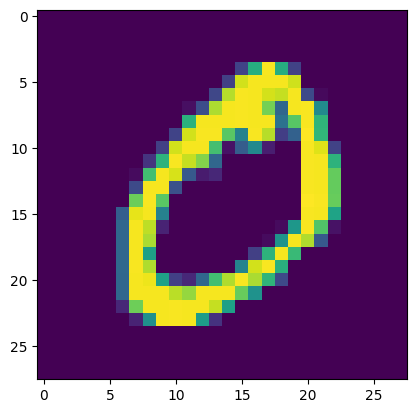

In [74]:
pl.imshow(X_train[1])

In [75]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# Normalisation(Min-Max)

In [76]:
def min_max(data):
    min=np.min(data)
    max=np.max(data)
    return (data - min) / (max - min)

X_test = min_max(X_test)
X_train = min_max(X_train)


In [77]:
np.max(X_train[1])

1.0

# Model Building

In [78]:
model = Sequential()

In [79]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

c:\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [80]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
model.compile(optimizer= 'Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [82]:
history = model.fit(X_train, Y_train, batch_size= 64, epochs=20,verbose=1, validation_split=0.2)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8404 - loss: 0.5621 - val_accuracy: 0.9499 - val_loss: 0.1756
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9544 - loss: 0.1623 - val_accuracy: 0.9614 - val_loss: 0.1340
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9676 - loss: 0.1097 - val_accuracy: 0.9669 - val_loss: 0.1102
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9759 - loss: 0.0808 - val_accuracy: 0.9690 - val_loss: 0.1041
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9812 - loss: 0.0623 - val_accuracy: 0.9673 - val_loss: 0.1028
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9847 - loss: 0.0517 - val_accuracy: 0.9731 - val_loss: 0.0908
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9881 - loss: 0.0406 - val_accuracy: 0.9728 - val_loss: 0.0910
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9921 - loss: 0.0303 - val_accuracy: 0.

In [83]:
model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[9.1465438e-12, 9.5502339e-13, 6.0917500e-08, ..., 9.9999940e-01,
        8.2600343e-11, 5.3385929e-08],
       [2.9182256e-12, 1.6910487e-07, 9.9999988e-01, ..., 1.0042255e-20,
        7.0494770e-11, 1.6587492e-18],
       [5.7665360e-08, 9.9973911e-01, 2.1759006e-05, ..., 2.8057484e-05,
        2.1042410e-04, 5.4778273e-08],
       ...,
       [4.7672451e-20, 4.7150623e-15, 3.3353343e-18, ..., 1.0317974e-09,
        3.6869445e-11, 2.6320649e-07],
       [6.7308901e-16, 3.2467728e-16, 6.1036559e-22, ..., 1.9568011e-14,
        1.7451201e-08, 1.1146767e-19],
       [2.3788558e-14, 2.3748104e-23, 4.0412920e-15, ..., 5.2210069e-24,
        3.6623140e-16, 2.0821644e-19]], dtype=float32)

In [84]:
np.argmax(model.predict(X_test), axis=-1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

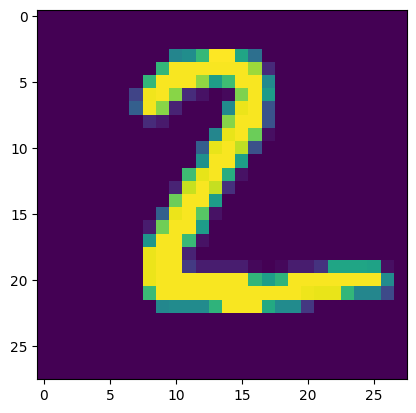

In [85]:
pl.imshow(X_test[1])

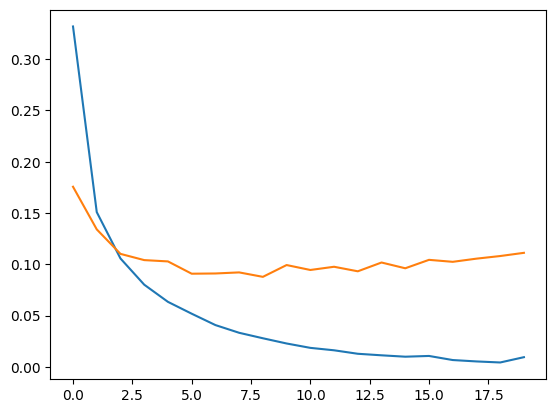

In [86]:
pl.plot(history.history['loss'])
pl.plot(history.history['val_loss'])

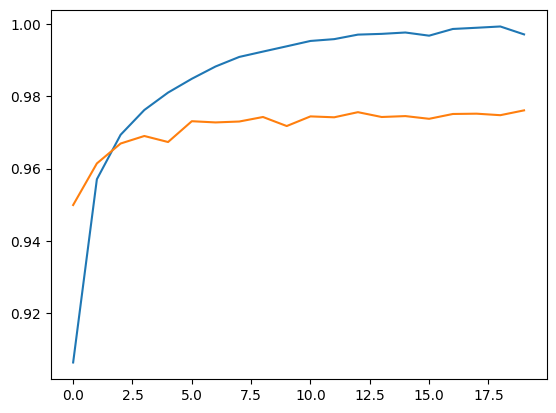

In [87]:
pl.plot(history.history['accuracy'])
pl.plot(history.history['val_accuracy'])

#TEsting

In [88]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=-1)

# Evaluate model performance
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

# Analyze predictions


print(classification_report(Y_test, predicted_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9750 - loss: 0.1116
Test Loss: 0.09748689830303192
Test Accuracy: 0.9771999716758728
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.96      0.97       892
           6       0.98      0.99      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.96      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

